In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data

orig_gdp = pd.read_csv("../datasets/OECD_GDP.csv", index_col=0)
data_gdp = orig_gdp.copy()
data_gdp

,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
LOCATION,,,,,,,
AUS,GDP,TOT,MLN_USD,A,1960,25034.740000,NaN
AUS,GDP,TOT,MLN_USD,A,1961,25326.382000,NaN
AUS,GDP,TOT,MLN_USD,A,1962,27913.206000,NaN
AUS,GDP,TOT,MLN_USD,A,1963,30385.723000,NaN
AUS,GDP,TOT,MLN_USD,A,1964,32694.467000,NaN
...,...,...,...,...,...,...,...
EU27_2020,GDP,TOT,USD_CAP,A,2016,39172.901704,NaN
EU27_2020,GDP,TOT,USD_CAP,A,2017,40728.833216,NaN
EU27_2020,GDP,TOT,USD_CAP,A,2018,42055.349198,NaN


In [2]:
# transform data
data_gdp = data_gdp[data_gdp['MEASURE']=='USD_CAP']  # USD_CAP

# OECD_contries
contries_c = ['JPN', 'FIN', 'SWE', 'NOR', 'DEU', 'AUS', 'FRA', 'CAN'
             ,'USA', 'DNK', 'ITA', 'NLD', 'CHE', 'BEL', 'GBR', 'AUT']
data_gdp = data_gdp[data_gdp.index.isin(contries_c)]

# select periods
periods = range(1970, 2019)
data_gdp = data_gdp[data_gdp['TIME'].isin(periods)]

# log_transformation
data_gdp['Value'] = np.log(data_gdp['Value'])

data_gdp

,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
LOCATION,,,,,,,
AUS,GDP,TOT,USD_CAP,A,1970,8.442230,NaN
AUS,GDP,TOT,USD_CAP,A,1971,8.486717,NaN
AUS,GDP,TOT,USD_CAP,A,1972,8.555536,NaN
AUS,GDP,TOT,USD_CAP,A,1973,8.662075,NaN
AUS,GDP,TOT,USD_CAP,A,1974,8.736886,NaN
...,...,...,...,...,...,...,...
USA,GDP,TOT,USD_CAP,A,2014,10.915234,NaN
USA,GDP,TOT,USD_CAP,A,2015,10.947849,NaN
USA,GDP,TOT,USD_CAP,A,2016,10.968214,NaN


In [3]:
import statsmodels.api as sm

# OLS
X = data_gdp[data_gdp['TIME']==1970]['Value']
gdp_1970 = data_gdp[data_gdp['TIME']==1970]['Value']
gdp_2018 = data_gdp[data_gdp['TIME']==2018]['Value']
X = X.values.reshape(-1,1)
X_ols = sm.add_constant(X)
y = (gdp_2018-gdp_1970).values.reshape(-1,1)
model = sm.OLS(y, X_ols)
res = model.fit()
y_pred =res.predict().reshape(-1,1)

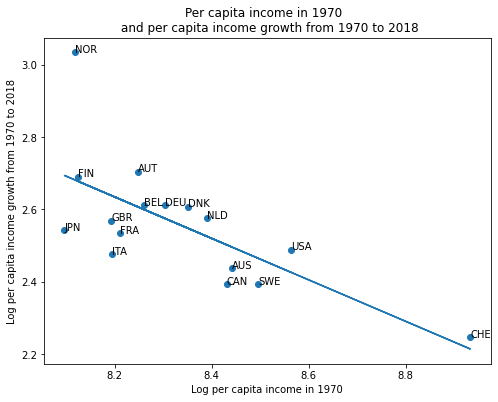

In [4]:
# plot
fig, ax = plt.subplots(figsize=(8, 6))

for i, txt in enumerate(data_gdp.index.unique()):
    ax.annotate(txt, (X[i], y[i]), size=10)

plt.scatter(X, y)
plt.plot(X, y_pred)

plt.title('Per capita income in 1970  \n and per capita income growth from 1970 to 2018')
plt.xlabel('Log per capita income in 1970') 
plt.ylabel('Log per capita income growth from 1970 to 2018')  

plt.savefig('fig_pergdp.png')

In [5]:
# print summary
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     13.57
Date:                Fri, 04 Jun 2021   Prob (F-statistic):            0.00245
Time:                        18:48:31   Log-Likelihood:                 11.265
No. Observations:                  16   AIC:                            -18.53
Df Residuals:                      14   BIC:                            -16.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3323      1.297      5.655      0.000       4.551      10.113
x1            -0.5729      0.156     -3.684      0.002      -0.906      -0.239
==============================================================================
Omnibus:                       10.809   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.462
Skew:                           1.265   Prob(JB):                       0.0240
Kurtosis:                       5.189   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""